# Task 2.2

__SUMMARY__
- Step 1: Import required libraries
- Step 2: Read all required datasets into dataframes
  - Read the processed datasets saved from Task 2.1 which include,
  - total_pop, urban_pop datasets where country codes are the index
  - geo_combined_pop which has urban_population_per_capita along with geometry for country codes
- Step 3: Data Preparation
  - calculate representative points for each geometry to help with labelling plots
  - calculate [mean world population] and [mean world per capita urban population]
- Step 4: Plotting
  - Plots for the different criteria mentioned

# STEP 1: IMPORT REQUIRED LIBRARIES
1. Pandas library to read/ edit tabular data from csv files, perform group operations if required, etc
2. Geopandas library to create geopandas dataframes, plot choropleth maps
3. matplotlib library to edit/ manipulate the plots

In [27]:
from IPython.display import display
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import seaborn as sns

# STEP 2: READ ALL REQUIRED DATASETS INTO DATAFRAMES
Data was already saved after processing it for Task 2.1

We read the processed data

## 2.1 Read total population dataset from saved pickle file (saved from Task 2.1)

In [28]:
total_pop = pd.read_pickle(r'Processed datasets/total_pop.pkl')
total_pop

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
AFG,Afghanistan,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
AGO,Angola,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
ALB,Albania,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
AND,Andorra,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN,NaN
YEM,"Yemen, Rep.","Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,5816247.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN,NaN
ZAF,South Africa,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,19888250.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN,NaN


## 2.2 Read urban population dataset from saved pickle file (saved from Task 2.1)

In [29]:
urban_pop = pd.read_pickle(r'Processed datasets/urban_pop.pkl')
urban_pop

,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,29253.0,...,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,46295.0,NaN,NaN
AFG,Afghanistan,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,1041191.0,...,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0,NaN,NaN
AGO,Angola,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,749534.0,...,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0,NaN,NaN
ALB,Albania,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,599300.0,...,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0,NaN,NaN
AND,Andorra,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,14262.0,...,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,67873.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,Urban population,SP.URB.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,"Yemen, Rep.",Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,598799.0,631542.0,666018.0,...,8065870.0,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0,NaN,NaN
ZAF,South Africa,Urban population,SP.URB.TOTL,7971774.0,8200255.0,8427003.0,8662570.0,8906585.0,9158950.0,9419473.0,...,33429132.0,34249974.0,35079618.0,35905874.0,36724030.0,37534797.0,38339668.0,39149717.0,NaN,NaN


## 2.3 Read per capita urban population dataset which has geometry values in it (saved from Task 2.1)

In [30]:
geo_combined_pop = gpd.read_file(r'Processed datasets/geo_combined_pop.shp')
geo_combined_pop.head()

,index,NAME,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,geometry
0,IDN,Indonesia,0.30584,0.31613,0.32703,0.33808,0.34933,0.36076,0.37235,0.38406,...,0.43568,0.44356,0.45149,0.45942,0.46738,0.47535,0.48335,0.49134,0.49914,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,MYS,Malaysia,0.49794,0.50576,0.51814,0.53109,0.54402,0.55688,0.56969,0.58237,...,0.63856,0.64780,0.65694,0.66594,0.67483,0.68360,0.69225,0.70075,0.70912,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,CHL,Chile,0.83271,0.83398,0.83564,0.83896,0.84223,0.84545,0.84861,0.85172,...,0.86606,0.86665,0.86725,0.86783,0.86842,0.86900,0.86959,0.87017,0.87074,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,BOL,Bolivia,0.55577,0.56579,0.57541,0.58079,0.58615,0.59150,0.59682,0.60212,...,0.62783,0.63248,0.63711,0.64170,0.64628,0.65082,0.65535,0.65984,0.66430,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,PER,Peru,0.68901,0.69300,0.69697,0.70089,0.70521,0.70951,0.71377,0.71798,...,0.73850,0.74249,0.74644,0.75034,0.75421,0.75803,0.76052,0.76241,0.76430,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


# STEP 3: DATA PREPARATION

## 3.1 set index values to be country codes in geo_combined_pop

After reading the saved shape file, we make the country codes as the index for easier processing

In [31]:
geo_combined_pop.set_index('index', inplace=True)

## 3.2 calculate representativepoints for each geometry which helps with labelling plots

In [32]:
geo_combined_pop['rep_coords'] = geo_combined_pop['geometry'].representative_point()
geo_combined_pop

,NAME,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2003,2004,2005,2006,2007,2008,2009,2010,geometry,rep_coords
index,,,,,,,,,,,,,,,,,,,,,
IDN,Indonesia,0.305840,0.316130,0.327030,0.338080,0.349330,0.360760,0.372350,0.384060,0.395930,...,0.443560,0.451490,0.459420,0.467380,0.475350,0.483350,0.491340,0.499140,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",POINT (113.32523 0.10491)
MYS,Malaysia,0.497940,0.505760,0.518140,0.531090,0.544020,0.556880,0.569690,0.582370,0.594960,...,0.647800,0.656940,0.665940,0.674830,0.683600,0.692250,0.700750,0.709120,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",POINT (102.11153 3.98945)
CHL,Chile,0.832710,0.833980,0.835640,0.838960,0.842230,0.845450,0.848610,0.851720,0.854770,...,0.866650,0.867250,0.867830,0.868420,0.869000,0.869590,0.870170,0.870740,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",POINT (-71.49640 -35.71034)
BOL,Bolivia,0.555770,0.565790,0.575410,0.580790,0.586150,0.591500,0.596820,0.602120,0.607390,...,0.632480,0.637110,0.641700,0.646280,0.650820,0.655350,0.659840,0.664300,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",POINT (-64.28580 -16.28784)
PER,Peru,0.689010,0.693000,0.696970,0.700890,0.705210,0.709510,0.713770,0.717980,0.722160,...,0.742490,0.746440,0.750340,0.754210,0.758030,0.760520,0.762410,0.764300,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",POINT (-75.76765 -9.18342)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLW,Palau,0.695909,0.699631,0.703393,0.707060,0.710714,0.714286,0.713068,0.710669,0.708256,...,0.695997,0.703830,0.711541,0.719089,0.726537,0.733907,0.741099,0.748148,"MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...",POINT (134.58089 7.54428)
GUM,Guam,0.907957,0.910608,0.913199,0.915712,0.918159,0.920549,0.922869,0.925131,0.927330,...,0.934351,0.935339,0.936308,0.937270,0.938217,0.939158,0.940079,0.940989,"POLYGON ((144.88640 13.64020, 144.89666 13.617...",POINT (144.76055 13.45962)
MNP,N. Mariana Is.,0.897316,0.896970,0.896613,0.896280,0.895931,0.895574,0.896551,0.897834,0.899126,...,0.903981,0.904779,0.905575,0.906374,0.907152,0.907954,0.908715,0.909488,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...",POINT (145.21334 14.15843)


## 3.3 Mean per capita urban population between 1990 and 2010
Unlike plotting, calculating mean calls for ignoring Nan values.

This is beacuse the mean value might fall because of the Nan values. So we use the skipna=True parameter when calculating means)

In [33]:
mean_per_capita_urban_pop_1990_2010 = geo_combined_pop.loc[:,'1990':'2010'].mean(skipna=True).to_frame(name='mean_per_capita_urban_pop')
mean_per_capita_urban_pop_1990_2010

,mean_per_capita_urban_pop
1990,0.526584
1991,0.530099
1992,0.530883
1993,0.533658
1994,0.536311
1995,0.540918
1996,0.543449
1997,0.546106
1998,0.550824
1999,0.553394


## 3.4 Mean total population between 1990 and 2010

In [34]:
mean_total_pop_1990_2010 = total_pop.loc[:,'1990':'2010'].mean(skipna=True).to_frame(name='mean_total_pop')
mean_total_pop_1990_2010

,mean_total_pop
1990,2.435092e+07
1991,2.475723e+07
1992,2.526356e+07
1993,2.565878e+07
1994,2.604981e+07
1995,2.632144e+07
1996,2.670463e+07
1997,2.708636e+07
1998,2.733720e+07
1999,2.770730e+07


## 3.5 Combined dataset
Create a single dataframe with both mean per capita urban population and mean total population for the entire world from 1990 to 2010

In [35]:
_1990_2010_combined_means = pd.merge(mean_per_capita_urban_pop_1990_2010, mean_total_pop_1990_2010, left_index=True, right_index=True)
_1990_2010_combined_means

,mean_per_capita_urban_pop,mean_total_pop
1990,0.526584,2.435092e+07
1991,0.530099,2.475723e+07
1992,0.530883,2.526356e+07
1993,0.533658,2.565878e+07
1994,0.536311,2.604981e+07
1995,0.540918,2.632144e+07
1996,0.543449,2.670463e+07
1997,0.546106,2.708636e+07
1998,0.550824,2.733720e+07
1999,0.553394,2.770730e+07


# STEP 4: PLOTTING

## 4.1 2010 Urban Population per Capita for countries with total population greater than 290 million

In [36]:
grt_290_mil = total_pop.index[total_pop['2010'] > 290000000].tolist()

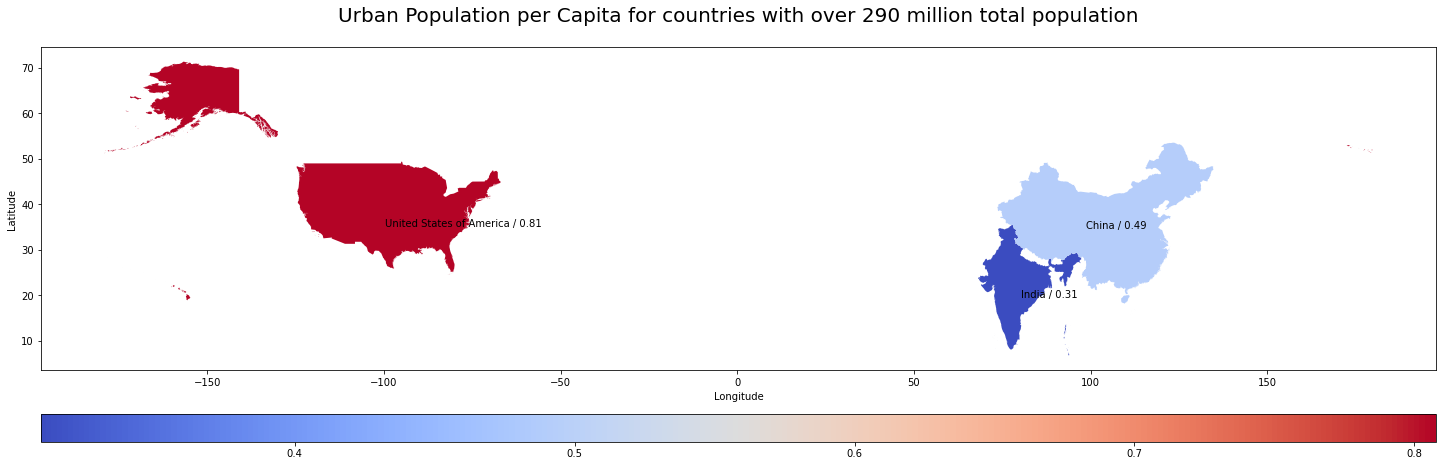

In [37]:
grt_290_mil_df = geo_combined_pop[geo_combined_pop.index.isin(grt_290_mil)]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(25, 16));

ax.set_title("Urban Population per Capita for countries with over 290 million total population", fontsize=20, pad=25)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

grt_290_mil_df.plot(column='2010', 
                      cmap='coolwarm',
                      ax=ax, 
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.05, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

for x, y, cntry, val in zip(grt_290_mil_df.rep_coords.x, grt_290_mil_df.rep_coords.y, grt_290_mil_df['NAME'], grt_290_mil_df['2010']):
    ax.annotate(f'{cntry} / {round(val,2)}', xy=(x, y), xytext=(0, -10), textcoords="offset points")

<div class="alert alert-block alert-info">
        <b> Interpretation </b>
        
There are only three countires with a total population greater than 290 million - China, India and United States of America
    
Among them United States of America has the highest per capita uprban population in 2010 (81%)
    
China has about 49% of population in urban areas while India has around 31% of population in it's urban areas,
</div>

## 4.2 2010 Urban Population per Capita for countries with total population less than 69 million

In [38]:
less_69_mil = total_pop.index[total_pop['2010'] < 69000000].tolist()

<span style="color:red">We are not labelling this plot as it will be over crowded</span>

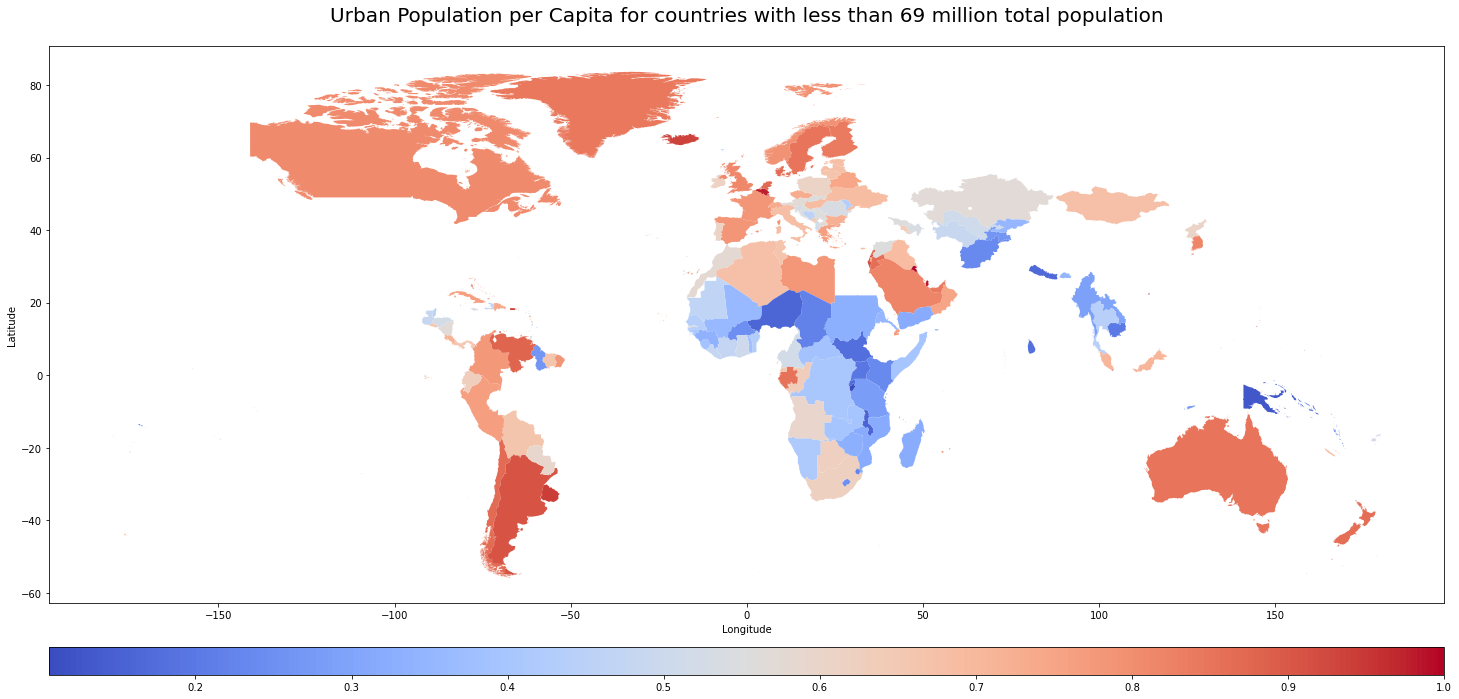

In [39]:
less_69_mil_df = geo_combined_pop[geo_combined_pop.index.isin(less_69_mil)]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(25, 16))

ax.set_title("Urban Population per Capita for countries with less than 69 million total population", fontsize=20, pad=25)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

less_69_mil_df.plot(column='2010', 
                      cmap='coolwarm',
                      ax=ax, 
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.05, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

# for x, y, label in zip(less_69_mil_df.rep_coords.x, less_69_mil_df.rep_coords.y, less_69_mil_df['NAME']):
#     ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=10)

# for x, y, val in zip(less_69_mil_df.rep_coords.x, less_69_mil_df.rep_coords.y, less_69_mil_df['2010']):
#     ax.annotate(f'{round(val,2)}', xy=(x, y), xytext=(0, -10), textcoords="offset points")

<div class="alert alert-block alert-info">
        <b> Interpretation </b>
        
There are many countries with a population less than 69 million.
    
Per capita urban population is higher for developed countries and a few developing countries. Canada, Australia, New Zealand, European countries, Korea, Middle Eastern countries and some South American countries have a higher per capita urban population.
    
On the other hand, African countries, Asian countries and some South American and East European countries have a low per capita urban population. 
    
It can be seen that developed countries and countries with higher GDPs have a higher per capital urban population than countries with lower GDP and developing countries,    
</div>

## 4.3 2010 Urban Population per Capita for countries with urban population between 110,146,163 and 223,096,279

In [40]:
bet_110_293_mil = urban_pop.index[(urban_pop['2010'] < 223096279) & (urban_pop['2010'] > 110146163)].tolist()

,NAME,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2003,2004,2005,2006,2007,2008,2009,2010,geometry,rep_coords
index,,,,,,,,,,,,,,,,,,,,,
IDN,Indonesia,0.30584,0.31613,0.32703,0.33808,0.34933,0.36076,0.37235,0.38406,0.39593,...,0.44356,0.45149,0.45942,0.46738,0.47535,0.48335,0.49134,0.49914,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",POINT (113.32523 0.10491)
BRA,Brazil,0.73922,0.74690,0.75444,0.76181,0.76903,0.77610,0.78302,0.79048,0.79781,...,0.82203,0.82521,0.82834,0.83143,0.83448,0.83749,0.84044,0.84335,"MULTIPOLYGON (((-57.61170 -30.18296, -57.56865...",POINT (-49.72801 -14.23886)
JPN,Japan,0.77339,0.77473,0.77610,0.77746,0.77881,0.78016,0.78145,0.78272,0.78398,...,0.83196,0.84640,0.85978,0.87118,0.88146,0.89103,0.89989,0.90812,"MULTIPOLYGON (((129.78321 31.79963, 129.79086 ...",POINT (143.33765 43.46212)


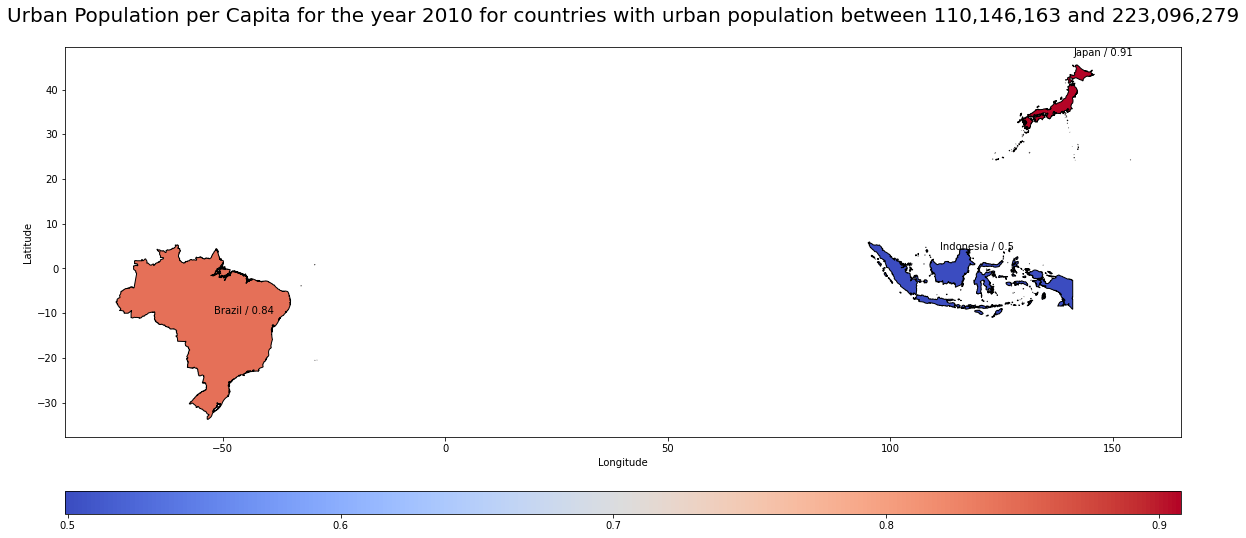

In [41]:
bet_110_293_mil_df = geo_combined_pop[geo_combined_pop.index.isin(bet_110_293_mil)]

display(bet_110_293_mil_df)

fig, ax = plt.subplots(1, 1, figsize=(20, 20));

ax.set_title("Urban Population per Capita for the year 2010 for countries with urban population between 110,146,163 and 223,096,279", fontsize=20, pad=25)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

bet_110_293_mil_df.plot(column='2010', 
                      edgecolor="black",
                      cmap='coolwarm',
                      ax=ax,
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.05, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

for x, y, cntry, val in zip(bet_110_293_mil_df.rep_coords.x, bet_110_293_mil_df.rep_coords.y, bet_110_293_mil_df['NAME'], bet_110_293_mil_df['2010']):
    ax.annotate(f'{cntry} / {round(val,2)}', xy=(x, y), xytext=(-10, 18), textcoords="offset points")

<div class="alert alert-block alert-info">
           <b> Interpretation </b>
     
There are three countries with an urban population between 110 million and 223 million.
    
Among them, Japan has the highest per capita urban population with around 91% of its population living in urban areas. It is followed by Brazil and Indonesia with 84% and 50% of their respective populations living in urban areas.

</div>

## 4.4 Percentage change in the urban population per capita from 1990 to 2010, for the country having the highest population in 2010

In [42]:
req_country = total_pop['2010'].idxmax()
req_country

'CHN'

In [43]:
china_tot_pop_2010 = geo_combined_pop.loc[req_country, '2010']
china_tot_pop_1990 = geo_combined_pop.loc[req_country, '1990']
china_pct_chg_tot_pop_1990_2010 = ((china_tot_pop_2010 - china_tot_pop_1990)/china_tot_pop_1990) * 100
print(china_pct_chg_tot_pop_1990_2010)

86.16594784197369


<div class="alert alert-block alert-info">
         <b> Interpretation </b>
       
China is the country with the largest total population in the world. 
    
It had an 86% change in urban population per capita from 1990 to 2010.
    
</div>

## 4.5 Mean per capita world urban population from 1990 to 2010

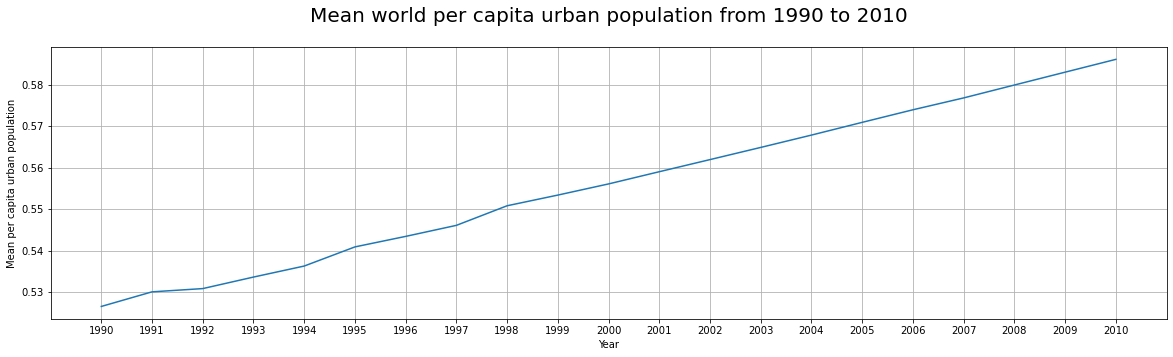

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5));
ax.set_title("Mean world per capita urban population from 1990 to 2010", fontsize=20, pad=25)
ax.set_xlabel("Year")
ax.set_ylabel("Mean per capita urban population")

sns.lineplot(x=_1990_2010_combined_means.index, y="mean_per_capita_urban_pop", data=_1990_2010_combined_means)
plt.grid()
plt.show()

<div class="alert alert-block alert-info">
        <b> Interpretation </b>
    
At a high level, it can be seen that the mean per capita urban population has increased over the entire timeframe between 1990 to 2010.
    
Starting at 1990, about 53% of the world's population was in urban areas and by 2010, it has increased to about 59%.
    
Using the gridlines, it can be seen that there is roughly a 1% increase approximately every three years.
    
</div>

## 4.5 Correlation plot between mean world population and mean per capita world urban population from 1990 to 2010

In [45]:
correlation_matrix = _1990_2010_combined_means.corr(method='pearson')
correlation_matrix

,mean_per_capita_urban_pop,mean_total_pop
mean_per_capita_urban_pop,1.000000,0.998218
mean_total_pop,0.998218,1.000000


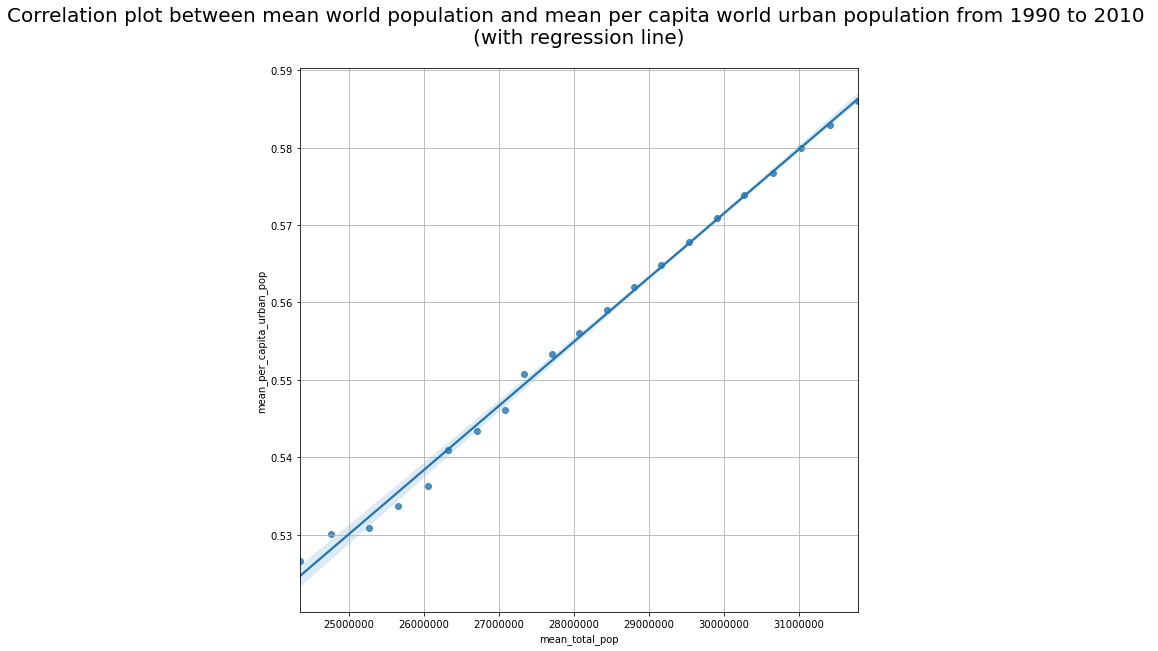

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
ax.set_title("Correlation plot between mean world population and mean per capita world urban population from 1990 to 2010 \n(with regression line)", fontsize=20, pad=25)
ax.set_xlabel("Mean world population")
ax.set_ylabel("Mean per capita urban population")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax = sns.regplot(x="mean_total_pop", y="mean_per_capita_urban_pop", data=_1990_2010_combined_means)

plt.grid()
plt.show()

<div class="alert alert-block alert-info">
    <b> Interpretation </b>

It can be seen that there is a correlation between mean world population and mean urban population per capita.
    
It is a positive correlation as we can see that mean population per capita has increased with the increase in mean total world population.
    
The interpretation from the plot can also be substantiated by the calculated correlation coefficient which has a value of 0.99 (closer to 1) which indicates a string positive correlation.
    
</div>

# References:

https://geopandas.org/docs/user_guide/mapping.html

https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi

https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/customize-plot-colors-labels-matplotlib/

https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

https://stackoverflow.com/questions/38899190/geopandas-label-polygons